# How are in demand skills trending for Data Analysts?


In [2]:
#Importing libraries 
import pandas as pd 
import matplotlib.pyplot as plt 
import ast 
import seaborn as sns 
from datasets import load_dataset 

#Loading data 
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

#Data Cleanup 
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x : ast.literal_eval(x) if pd.notna(x) else x) 

In [3]:
df_DA_india = df[(df['job_country'] == 'India') & (df['job_title_short'] == 'Data Analyst')].copy()

In [4]:
df_DA_india['job_posted_month_no'] = df_DA_india['job_posted_date'].dt.month

In [5]:
df_DA_india_explode = df_DA_india.explode('job_skills')
df_DA_india_pivot = df_DA_india_explode.pivot_table( index = 'job_posted_month_no' , columns = 'job_skills', aggfunc = 'size' , fill_value = 0)

In [6]:
df_DA_india_pivot.loc['Total'] = df_DA_india_pivot.sum()
df_DA_india_pivot = df_DA_india_pivot[df_DA_india_pivot.loc['Total'].sort_values(ascending = False).index]
df_DA_india_pivot = df_DA_india_pivot.drop('Total')
df_DA_india_pivot

job_skills,sql,python,excel,tableau,power bi,r,sas,azure,aws,powerpoint,...,hugging face,fastapi,kotlin,powerbi,mariadb,sqlite,clickup,suse,twilio,centos
job_posted_month_no,,,,,,,,,,,,,,,,,,,,,
1,305,216,218,159,98,89,128,46,32,43,...,0,1,0,0,0,0,0,0,1,0
2,209,148,156,116,75,67,82,26,33,25,...,0,0,0,0,0,0,0,0,0,0
3,229,151,138,125,76,58,62,45,38,29,...,0,0,0,1,0,0,0,1,0,0
4,204,143,138,98,83,56,52,40,31,28,...,0,0,0,0,0,0,0,0,0,0
5,155,101,106,71,61,42,30,33,22,19,...,0,0,0,0,0,0,0,0,0,1
6,193,150,115,114,77,76,74,37,32,24,...,0,0,0,0,0,0,0,0,0,0
7,245,161,174,124,93,67,78,39,31,31,...,1,0,1,0,0,0,0,0,0,0
8,317,216,192,152,127,112,98,52,63,40,...,0,0,0,0,0,0,0,0,0,0
9,341,229,228,195,168,100,92,35,41,29,...,0,0,0,0,0,0,0,0,0,0


In [7]:
df_totals = df_DA_india.groupby('job_posted_month_no').size()

In [8]:
df_DA_india_percent = df_DA_india_pivot.div(df_totals/100 , axis = 0)
df_DA_india_percent

job_skills,sql,python,excel,tableau,power bi,r,sas,azure,aws,powerpoint,...,hugging face,fastapi,kotlin,powerbi,mariadb,sqlite,clickup,suse,twilio,centos
job_posted_month_no,,,,,,,,,,,,,,,,,,,,,
1,48.566879,34.394904,34.713376,25.318471,15.605096,14.171975,20.382166,7.324841,5.095541,6.847134,...,0.000000,0.159236,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.159236,0.000000
2,48.267898,34.180139,36.027714,26.789838,17.321016,15.473441,18.937644,6.004619,7.621247,5.773672,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
3,54.265403,35.781991,32.701422,29.620853,18.009479,13.744076,14.691943,10.663507,9.004739,6.872038,...,0.000000,0.000000,0.000000,0.236967,0.0,0.000000,0.000000,0.236967,0.000000,0.000000
4,48.803828,34.210526,33.014354,23.444976,19.856459,13.397129,12.440191,9.569378,7.416268,6.698565,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
5,55.755396,36.330935,38.129496,25.539568,21.942446,15.107914,10.791367,11.870504,7.913669,6.834532,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.359712
6,52.588556,40.871935,31.335150,31.062670,20.980926,20.708447,20.163488,10.081744,8.719346,6.539510,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
7,53.610503,35.229759,38.074398,27.133479,20.350109,14.660832,17.067834,8.533917,6.783370,6.783370,...,0.218818,0.000000,0.218818,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
8,51.294498,34.951456,31.067961,24.595469,20.550162,18.122977,15.857605,8.414239,10.194175,6.472492,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
9,54.126984,36.349206,36.190476,30.952381,26.666667,15.873016,14.603175,5.555556,6.507937,4.603175,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000


In [9]:
#change month no. to month name 
df_DA_india_percent =  df_DA_india_percent.reset_index()
df_DA_india_percent['job_posted_month'] = df_DA_india_percent ['job_posted_month_no'].apply(lambda x : pd.to_datetime(x , format = '%m').strftime('%b'))
df_DA_india_percent = df_DA_india_percent.set_index('job_posted_month')
df_DA_india_percent = df_DA_india_percent.drop(columns = 'job_posted_month_no') 


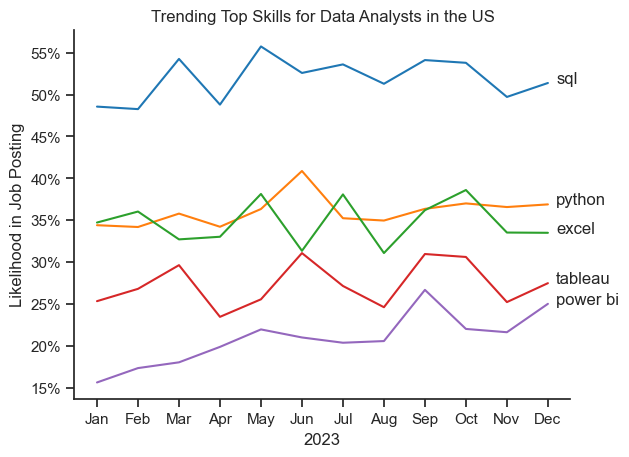

In [33]:
df_plot = df_DA_india_percent.iloc[: , :5]
sns.lineplot(data = df_plot , dashes = False , palette ='tab10' , legend = False)
sns.set_theme(style = 'ticks')
sns.despine()

from matplotlib.ticker import PercentFormatter
ax = plt.gca()
ax.yaxis.set_major_formatter(PercentFormatter(decimals = 0))

plt.title('Trending Top Skills for Data Analysts in the US')
plt.ylabel('Likelihood in Job Posting')
plt.xlabel('2023')

for i in range(5):
    plt.text( 11.2 , df_plot.iloc[-1, i], df_plot.columns[i])

 
